# fashion mnist のデータセットを用いて，ソフトマックス回帰を実装してください．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def np_log(x):
    """
    log関数のオーバーフローを防ぐ実装，clipで値を制限
    """
    return np.log(np.clip(x, 1e-10, 1e+10))

def softmax(x, axis=1):
    # WRITE ME

In [ ]:
# 上記の勾配に基づいて，パラメータを更新するupdate関数を定義しよう
class SoftmaxRegression():
    def __init__(self, in_dim, out_dim):
        """
        パラメータの初期化を行う．
        in_dim: 入力次元数
        out_dim: 出力次元数（ラベルの数）
        """
        self.W = # WRITE ME
        self.b = # WRITE ME

    def predict(self, x):
        # WRITE ME

    def cost(self, y_true, y_pred):
        """
        y_true: 真の値
        y_pred: ソフトマックス後の予測値（確率値）
        """
        J = # WRITE ME

        return J
    def update(self, X, Y, alpha):
        # WRITEME

        # 予測値の計算
        Y_hat = # WRITE ME

        # 誤差の計算
        delta =  # WRITE ME

        # 勾配の計算
        dW =  # WRITE ME
        db =  # WRITE ME

        # パラメータの更新
        self.W -=  # WRITE ME
        self.b -=  # WRITE ME


        return self.cost(Y, self.predict(X))

SyntaxError: ignored

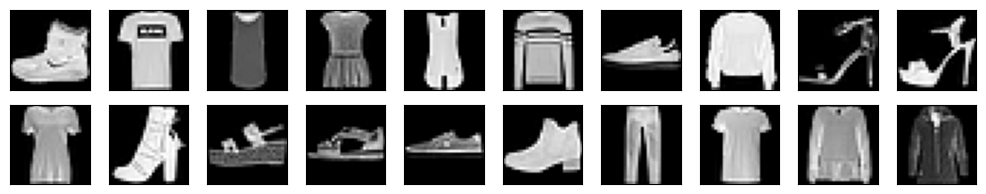

In [ ]:
# fashion_mnistデータセットを学習させる
# fashion_mnist: 服や靴，帽子などの画像データ．10ラベル
from keras.datasets import fashion_mnist as fmnist
(x_fmnist_1, y_fmnist_1), (x_fmnist_2, y_fmnist_2) = fmnist.load_data()

x_fmnist = np.r_[x_fmnist_1, x_fmnist_2]
y_fmnist = np.r_[y_fmnist_1, y_fmnist_2]

fig = plt.figure(figsize=(10, 10))

for i in range(20):
    x = x_fmnist[i]
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x, 'gray')
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
# データの前処理：正規化や一次元化したりする．
# データの分割；今回は訓練データとテストデータに分け，さらに訓練データを検証用データと訓練データに分けた．
from sklearn.model_selection import train_test_split
x_fmnist = x_fmnist.astype('float32') / 255.
y_fmnist = np.eye(N=10)[y_fmnist.astype('int32').flatten()]

x_fmnist=x_fmnist.reshape(x_fmnist.shape[0],-1)

x_train_fmnist, x_test_fmnist, y_train_fmnist, y_test_fmnist = train_test_split(x_fmnist, y_fmnist, test_size=10000)
x_train_fmnist, x_valid_fmnist, y_train_fmnist, y_valid_fmnist = train_test_split(x_train_fmnist, y_train_fmnist, test_size=10000)

In [ ]:
# 学習
# モデルのインスタンスを生成
from sklearn.metrics import accuracy_score
sreg = SoftmaxRegression(in_dim=x_fmnist.shape[1], out_dim=y_fmnist.shape[1])

# バッチサイズを指定
batch_size = 500 #X_train.shape[0]

# 学習率を指定
alpha = 0.001
# alpha = 0.00001

# epoch数を指定
epochs = 1000

# 乱数シードを固定
np.random.seed(1)

# 描画のための配列を用意
iter = int(x_train_fmnist.shape[0]/batch_size)
_ = [i+1 for i in range(epochs)]
cost_J = []

for epoch in range(epochs):
    # np.random.permutation: 配列の要素をランダムに並べ替える関数
    # [1, 2, 3, 4, 5, 6] -> [5, 3, | 1, 4, | 6, 2]
    idxs = np.random.permutation(x_train_fmnist.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = x_train_fmnist[idx][:]
        _y = y_train_fmnist[idx][:]
        c = sreg.update(_X, _y, alpha=alpha)
    cost_J.append(np_log(c))
    if epoch % 10 == 0:
        print("EPOCH: {}, cost: {}, accuracy: {}".format(epoch, c, accuracy_score(sreg.predict(x_valid_mnist).argmax(axis=1), y_valid_mnist.argmax(axis=1))))
    if epoch == 500 :
         alpha /= 1000

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(_, cost_J)
plt.show()

In [ ]:
# テストデータを用いて，精度を見る．
# 78%以上目指してね
print("テストデータスコア:", accuracy_score(sreg.predict(x_test_fmnist).argmax(axis=1), y_test_fmnist.argmax(axis=1)))